In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-3.99059554,  5.46871591],
       [-6.48315583,  4.82036307],
       [-2.19899392,  2.8547614 ],
       ...,
       [-0.63278395,  3.39330267],
       [-2.03062861,  4.18540714],
       [ 2.81215023,  4.51472991]], shape=(1000, 2))

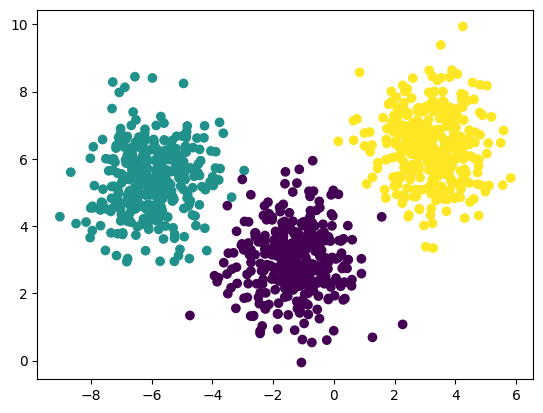

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
##stnadarization -feature sccaling technique 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
##elbow methid to select the k value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_Scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000005,
 651.5377757441022,
 262.5065813057819,
 217.35896472856936,
 167.13866347664904,
 125.72990843307235,
 115.14235015011288,
 99.11630944064126,
 87.80685505169106,
 93.16651260440008]

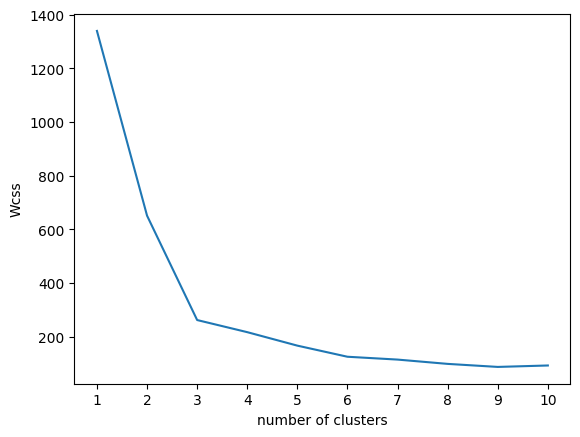

In [13]:
##how to determine which specific k value
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("Wcss")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_Scaled)

array([1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0,
       1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1,

In [16]:
y_pred = kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1,
       2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2,

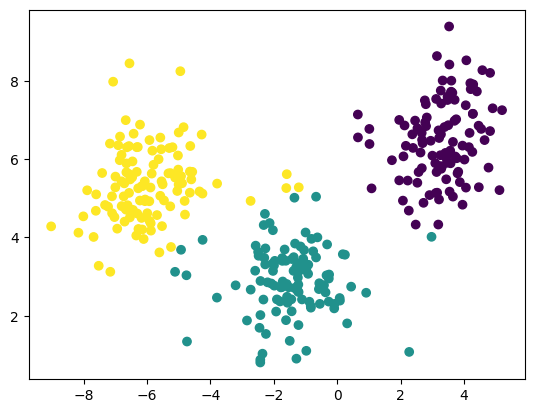

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
##validating k value
##two thinfs

##knee locator and silhoutee scoring

In [22]:
# ##knee locator
# !pip install kneed

In [26]:
from kneed import KneeLocator

In [27]:
k1 = KneeLocator(range(1,11),wcss,curve='convex',direction = "decreasing")

In [ ]:
##we can validate that hubdurbt changes
k1.elbow

np.int64(3)

In [29]:
##silhitte score
from sklearn.metrics import silhouette_score

In [30]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_Scaled)
    score = silhouette_score(X_train_Scaled,kmeans.labels_)
    silhoutte_coefficients.append(score)

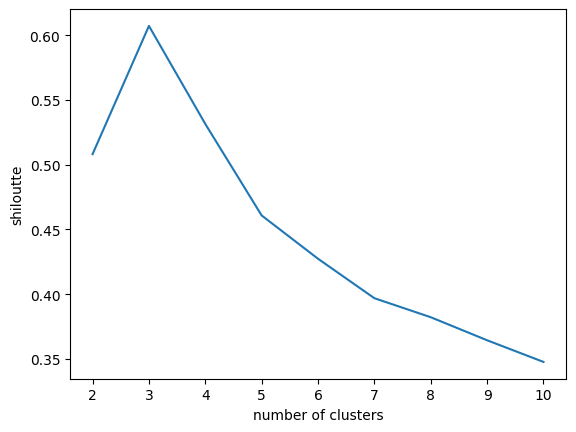

In [32]:
##how to determine which specific k value
plt.plot(range(2,11), silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("shiloutte")
plt.show()